# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение общей информации. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('/datasets/real_estate_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

In [7]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Т.к. данные отобразились в одну строку вместо колонок, стоит прочитать файл real_estate_data.csv из папки datasets, используя в качестве разделителя знак табуляции \t.

In [10]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Приведем к правильному стилю название CityCentres

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

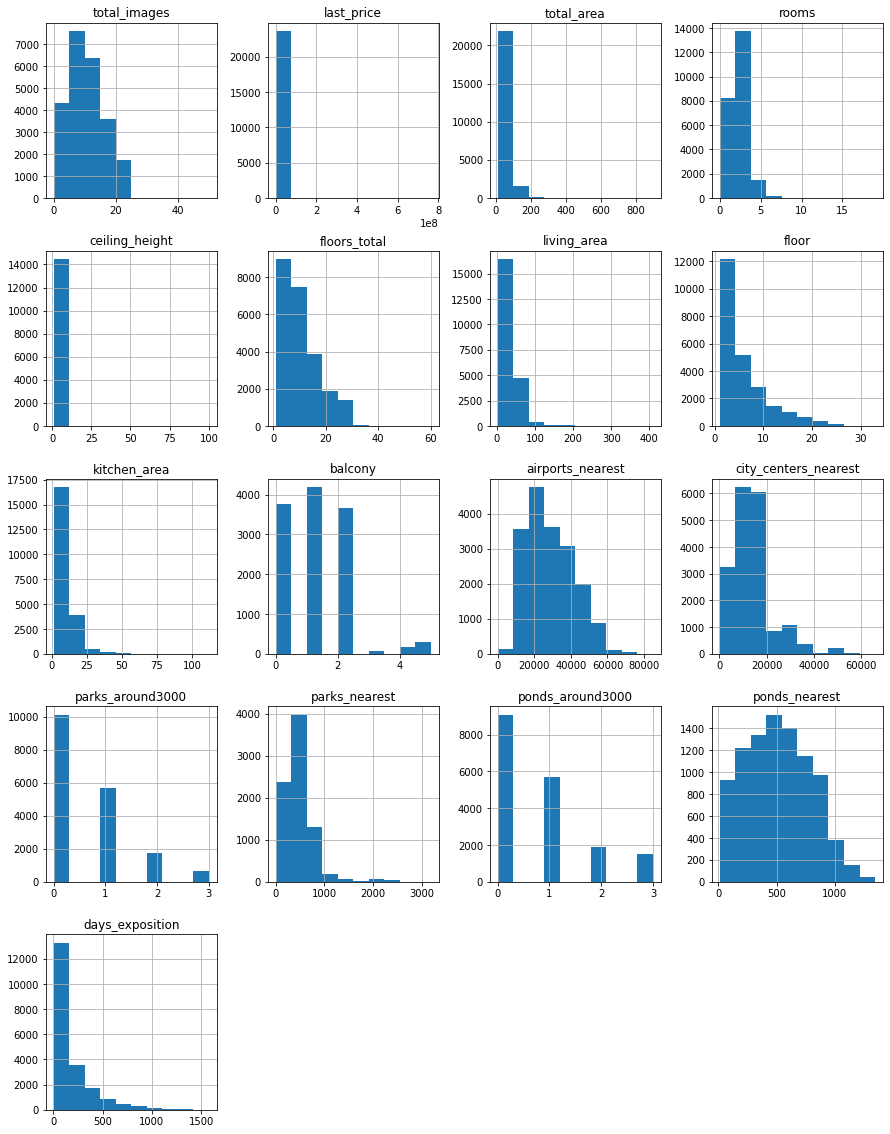

In [12]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно полученной информации в таблице 22 колонки и 23 699 записей. Мы видимо, что во многих колонка есть пропуски, притом как в тех, которые заполняют сами пользователи (что говорит о человеческом факторе), так и в картографических колонках.

In [14]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [15]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [16]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [17]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Переведем значения в столбце first_day_exposition в привычный формат даты.

In [19]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [20]:
data =  data[(data['rooms'] != 11) & (data['rooms'] != 14) & (data['rooms'] != 15)& (data['rooms'] != 19) & (data['rooms'] != 16) & (data['rooms'] != 12)]

In [21]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7,  8, 10,  9])

На мой взгляд, комнаты больше 10 это крайне редкие случаи, аномальные, и их можно просто удалить.

In [22]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [23]:
data.dropna(subset=['floors_total'], inplace=True)

Удалила строки без этажей, но не стала трогать номера этажей, т.к. самое высокое здание в Спб имеет 87 этажей (Лахта-центр) и кто знает?

In [24]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,
      

In [25]:
data = data.loc[data['ceiling_height'] > 2.4]

In [26]:
data['ceiling_height'].unique()

array([  2.7 ,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,   2.6 ,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   3.4 ,   3.06,
         2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,   3.7 ,
         2.52,   5.2 ,   2.87,   2.66,   2.59,   2.45,   3.6 ,   2.92,
         3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,   2.53,
         2.74,   2.96,   2.46,   5.3 ,   5.  ,   2.79,   2.95,   4.06,
         2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,   3.38,   3.01,
         5.6 ,   3.65,   3.9 ,   3.18,   3.35,   3.57,   2.48,   2.62,
         2.82,   3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,
         3.67,   3.87,   3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,
         3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,
      

Т.к. согласно интернету, минимальное значение высоты потолков в РФ = 2.4 м, остальные удалила. Вероятно, можно было их "дорастить", но сочла, что в имеющихся данных это несущественно.

In [27]:
data = data.replace({'ceiling_height':{25:2.5, 32:3.2, 26:2.6, 27:2.7, 24:2.4, 20:2.4, 14:2.4, 27.5:2.75, 22.6:2.26}})

In [28]:
data['ceiling_height'].unique()

array([  2.7 ,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,   2.6 ,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   3.4 ,   3.06,
         2.72,   2.54,   2.51,   2.78,   2.76,   2.58,   3.7 ,   2.52,
         5.2 ,   2.87,   2.66,   2.59,   2.45,   3.6 ,   2.92,   3.11,
         3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,   2.53,   2.74,
         2.96,   2.46,   5.3 ,   5.  ,   2.79,   2.95,   4.06,   2.94,
         3.82,   3.54,   3.53,   2.83,   4.7 ,   3.38,   3.01,   5.6 ,
         3.65,   3.9 ,   3.18,   3.35,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,
         4.2 ,   3.36,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
         3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   3.14,   4.37,
      

Привела явные аномалии типа 25 м высоты к более правдоподобным 2.5 м.

In [29]:
data = data.loc[data['ceiling_height'] < 5.9]

In [30]:
data['ceiling_height'].unique()

array([2.7 , 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66, 2.59,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94, 3.82, 3.54,
       3.53, 2.83, 4.7 , 3.38, 3.01, 5.6 , 3.65, 3.9 , 3.18, 3.35, 3.57,
       2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67,
       3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08,
       3.68, 3.07, 3.37, 3.09, 3.16, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14,
       4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 2.4 , 3.47, 3.33, 3.63,
       3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23,
       3.02, 3.21, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 3.51, 3.93,
       3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.

Также убрала высоту потолков от 6 м, как неправдоподобную.

In [31]:
data['living_area'].unique()

array([51.  , 32.  , 43.6 , ..., 13.59,  3.  , 12.6 ])

In [32]:
data = data.loc[data['living_area'] > 3]

In [33]:
data['living_area'].unique()

array([51.  , 32.  , 43.6 , ..., 30.75, 13.59, 12.6 ])

3 метра - что за собачья конура? Удаляем.

In [34]:
data['floor'].unique()

array([ 8, 13,  7,  3,  5,  1,  2, 11, 15,  9, 18,  4, 22, 19, 20,  6, 10,
       25, 17, 14, 12, 21, 24, 16, 23, 30, 26, 27, 29])

In [35]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [36]:
data['is_apartment']=data['is_apartment'].fillna(False)

В колонке is_apartment не везде было указано, что это апартаменты. Заменим пропуски на False.

In [37]:
data['is_apartment'].unique()

array([False,  True])

In [38]:
data['studio'].unique()

array([False,  True])

In [39]:
data['open_plan'].unique()

array([False,  True])

In [40]:
data['kitchen_area'].unique()

array([25.  , 41.  ,  6.5 ,  8.5 ,  5.2 ,  9.  ,  5.6 , 12.  , 11.  ,
        6.1 , 15.  ,  9.2 , 11.7 , 13.4 ,  8.  , 11.6 ,  8.8 , 10.  ,
       17.6 ,  7.5 ,  7.  ,  8.3 ,  6.  , 50.  , 10.7 , 11.1 , 11.9 ,
       16.  ,  5.3 , 11.5 ,  7.2 ,  6.2 ,  7.1 ,  4.9 ,  7.3 , 11.95,
       10.2 ,  5.5 , 13.  , 20.  ,  6.3 ,  8.4 ,  5.  , 24.  , 17.  ,
       26.85, 15.4 ,  7.8 , 33.8 ,  7.6 , 12.72, 12.2 ,   nan, 19.  ,
        7.9 , 10.3 ,  9.8 , 17.5 , 14.7 , 21.3 , 10.6 ,  7.7 , 12.5 ,
       10.4 ,  5.7 , 11.4 ,  8.6 , 14.1 , 10.9 , 12.9 , 21.5 , 35.  ,
       10.5 ,  8.2 ,  9.5 ,  8.7 , 49.2 ,  9.6 , 14.2 ,  8.1 , 10.44,
       14.4 ,  5.4 , 16.3 ,  6.4 ,  7.4 , 11.3 ,  9.4 , 13.1 ,  8.9 ,
       11.2 , 22.  , 30.  , 36.  , 10.8 ,  9.9 , 18.  , 19.4 ,  4.5 ,
       11.8 ,  9.7 , 17.7 ,  5.1 , 21.1 , 14.  , 13.5 , 16.5 , 13.2 ,
       17.2 , 77.  , 12.3 ,  9.3 ,  9.28, 13.8 , 16.1 , 14.5 , 15.5 ,
       23.1 , 10.1 , 23.  , 16.2 , 19.2 , 15.1 , 26.4 , 10.59,  9.57,
       23.43, 15.2 ,

In [41]:
data = data.loc[data['kitchen_area'] < 21]

Тк максимальная площадь квартиры у нас 138 м, кухня более 20 м кажется невозможной.

In [42]:
data['kitchen_area'].unique()

array([ 6.5 ,  8.5 ,  5.2 ,  9.  ,  5.6 , 12.  , 11.  ,  6.1 , 15.  ,
        9.2 , 11.7 , 13.4 ,  8.  , 11.6 ,  8.8 , 10.  , 17.6 ,  7.5 ,
        7.  ,  8.3 ,  6.  , 10.7 , 11.1 , 11.9 , 16.  ,  5.3 , 11.5 ,
        7.2 ,  6.2 ,  7.1 ,  4.9 ,  7.3 , 11.95, 10.2 ,  5.5 , 13.  ,
       20.  ,  6.3 ,  8.4 ,  5.  , 17.  , 15.4 ,  7.8 ,  7.6 , 12.72,
       12.2 , 19.  ,  7.9 , 10.3 ,  9.8 , 17.5 , 14.7 , 10.6 ,  7.7 ,
       12.5 , 10.4 ,  5.7 , 11.4 ,  8.6 , 14.1 , 10.9 , 12.9 , 10.5 ,
        8.2 ,  9.5 ,  8.7 ,  9.6 , 14.2 ,  8.1 , 10.44, 14.4 ,  5.4 ,
       16.3 ,  6.4 ,  7.4 , 11.3 ,  9.4 , 13.1 ,  8.9 , 11.2 , 10.8 ,
        9.9 , 18.  , 19.4 ,  4.5 , 11.8 ,  9.7 , 17.7 ,  5.1 , 14.  ,
       13.5 , 16.5 , 13.2 , 17.2 , 12.3 ,  9.3 ,  9.28, 13.8 , 16.1 ,
       14.5 , 15.5 , 10.1 , 16.2 , 19.2 , 15.1 , 10.59,  9.57, 15.2 ,
        8.07, 13.39, 15.3 , 18.5 , 19.9 , 16.9 ,  5.49,  6.8 ,  6.7 ,
       13.6 , 10.75, 18.8 , 17.8 ,  2.  ,  5.8 , 11.06, 12.6 , 11.35,
        6.6 , 20.6 ,

In [43]:
data['balcony'].unique()

array([ 2., nan,  1.,  0.,  5.,  4.,  3.])

In [44]:
data['balcony']=data['balcony'].fillna(0)
data['balcony']=data['balcony'].astype(int)

В колонке balcony заменим пропуски на 0, а затем заменим значения на целочисленный тип

In [45]:
data['balcony'].unique()

array([2, 0, 1, 5, 4, 3])

In [46]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'посёлок Мурино', 'Сертолово',
       'Гатчина', 'поселок Мурино', 'Ломоносов', 'деревня Фёдоровское',
       'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'поселок Оредеж',
       'посёлок городского типа Красный Бор', 'посело

In [47]:
data['locality_name']=data['locality_name'].fillna('неизвестный адрес')

In [48]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')

In [49]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

In [50]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

In [51]:
data['locality_name'] = data['locality_name'].str.replace('село', 'поселок')

In [52]:
data['locality_name'] = data['locality_name'].str.replace('поселок железнодорожной станции', 'поселок')

In [53]:
data['locality_name'] = data['locality_name'].str.replace('попоселокк', 'поселок')

In [54]:
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'поселок')

In [55]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')

In [56]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'поселок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок Мурино', 'Сертолово',
       'Гатчина', 'Ломоносов', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Колпино', 'Кировск', 'деревня Новое Девяткино',
       'поселок Сиверский', 'поселок Новая Ропша', 'Павловск',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок Кузьмоловский', 'деревня Куттузи', 'поселок Торковичи',
       'поселок Шушары', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'деревня Старая', 'деревня Лесколово',
       'поселок Путилово', 'Ивангород', 'Сланцы', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'деревня Оржицы',
       'деревня Кальтино', 'Кудрово', 'поселок Рощино', 'Сясьстрой',
       'Кириши', 'Луга', 'Волосово', 'поселок Оредеж',
       'поселок Красный Бор', 'поселок Бугры', 'поселок Металлострой',
       'поселок Молодёжное', 'деревня Нурма', 'поселок Синявино',
      

In [57]:
data['airports_nearest'].unique()

array([50898., 38357., 37868., ..., 28323., 11751., 24665.])

In [58]:
data['city_centers_nearest'].unique()

array([15008., 13878., 33058., ..., 27977.,  7262.,  4232.])

В рамках проекта была проведена детальная предобработка данных, в частности, удалены как аномалии квартиры с более 10 комнатами, строки без этажей,  квартиры с потолками ниже 2,4 м. Потолки типа 25 м были приведены к более адекватному виду 2,5 м. Удалены квартиры с жилплощадью менее 3 м и кухней более 20 м. Пропуски в апартаментах заменены на False. Детально обработаны неявные дубликаты.

### Посчитайте и добавьте в таблицу новые столбцы

In [59]:
#Посчитаем и добавим в таблицу цену квадратного метра:
data['price_for_m2']=data['last_price'] / data['total_area']

In [60]:
#Посчитаем и добавим в таблицу день недели публикации объявления:
data['week_day']=pd.DatetimeIndex(data['first_day_exposition']).weekday

In [61]:
#Посчитаем и добавим в таблицу месяц публикации объявления:
data['month']=pd.DatetimeIndex(data['first_day_exposition']).month

In [62]:
#Посчитаем и добавим в таблицу год публикации объявления:
data['year']=pd.DatetimeIndex(data['first_day_exposition']).year

In [63]:
#Добавим в таблицу характеристику этажа квартиры (первый, последний или другой):
import numpy as np
def floor_group(floor, floors_total):
    return np.where(floor==floors_total, 'последний', np.where(floor==1, 'первый', 'другой'))
data['floor_group'] = floor_group(data['floor'], data['floors_total'])

In [64]:
#Добавим в таблицу соотношение жилой и общей площади (k_living), а также отношение площади кухни к общей (k_kitchen):
data['k_living'] = data['living_area'] / data['total_area']
data['k_kitchen'] = data['kitchen_area'] / data['total_area']

In [65]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_group,k_living,k_kitchen
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,последний,0.630841,0.121495
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый,0.678049,0.109756
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104838.709677,4,1,2017,другой,0.625806,0.180645


### Проведите исследовательский анализ данных

# Изучение параметров объектов:

Text(0, 0.5, 'Количество квартир')

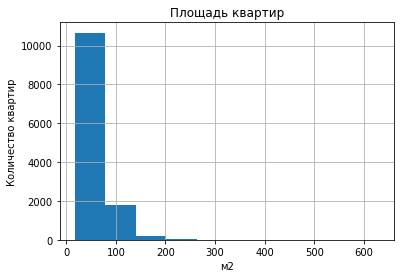

In [66]:
#Построим гистограму для площади квартиры:
data['total_area'].hist()
plt.title('Площадь квартир')
plt.xlabel('м2')
plt.ylabel('Количество квартир')

Большая часть значений собралась в столбце с площадью до 100 м2. Возможно стоит увеличить число корзин до 100 и изучить распределение значений total_area, находящихся в диапазоне от 0 до 200 м2

Text(0, 0.5, 'Количество квартир')

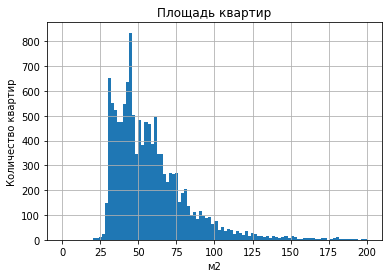

In [67]:
data['total_area'].hist(bins=100, range=(0, 200))
plt.title('Площадь квартир')
plt.xlabel('м2')
plt.ylabel('Количество квартир')

Есть 2 пика в диапазоне площади от 25 до 50 м2. Очень мало значений площади после 125 м2

Text(0, 0.5, 'Количество квартир')

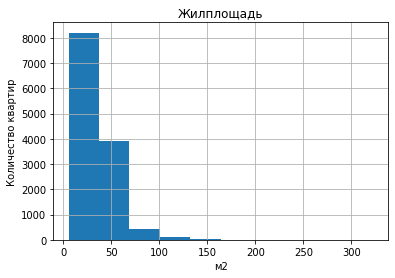

In [68]:
#Построим гистограму для жилой площади:
data['living_area'].hist()
plt.title('Жилплощадь')
plt.xlabel('м2')
plt.ylabel('Количество квартир')

Большая часть квартир имеет жилплощадь не более 55 м2.

Text(0, 0.5, 'Количество квартир')

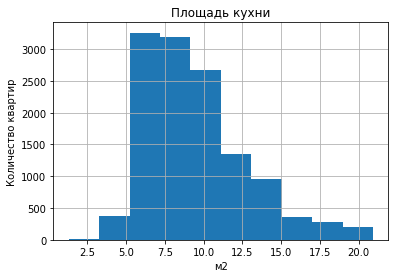

In [69]:
#Построим гистограму для площади кухни:
data['kitchen_area'].hist()
plt.title('Площадь кухни')
plt.xlabel('м2')
plt.ylabel('Количество квартир')

В большинстве квартир кухни площадью от 5 до 10,5 м2.

Text(0, 0.5, 'Количество квартир')

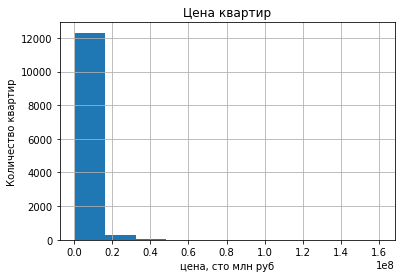

In [70]:
#Построим гистограму для цены квартиры:
data['last_price'].hist()
plt.title('Цена квартир')
plt.xlabel('цена, сто млн руб')
plt.ylabel('Количество квартир')

Почти все значения цены находятся в столбце от 0 до 75 млн руб. Следует изучить распределение значений last_price, находящихся в диапазоне от 0 до 30 млн руб

Text(0, 0.5, 'Количество квартир')

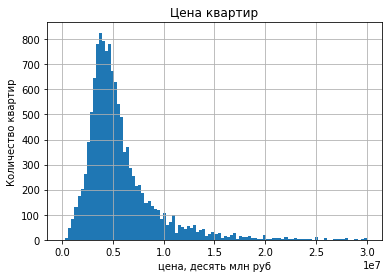

In [71]:
data['last_price'].hist(bins=100, range=(0,30000000))
plt.title('Цена квартир')
plt.xlabel('цена, десять млн руб')
plt.ylabel('Количество квартир')

В целом, в СПБ и окрестностях достаточно недорогие кваритиры (в сраванении с Мск). Выделяется пик около 4 млн руб. В целом большую часть гистограммы занимают значения от 3 млн до 7 млн руб. Более 12-13 млн руб квартир немного.

Text(0, 0.5, 'Количество квартир')

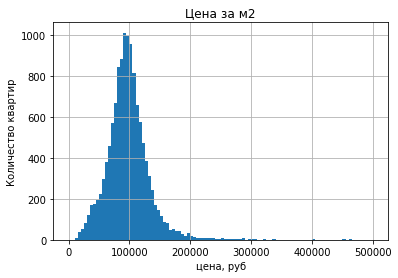

In [72]:
#Построим гистограму для цены за 1 м2 квартиры:
data['price_for_m2'].hist(bins=100, range=(0,500000))
plt.title('Цена за м2')
plt.xlabel('цена, руб')
plt.ylabel('Количество квартир')

В среднем цена за метр составляет около 90 тыс руб, цена самого дешевого метра не превышает 10 тыс руб (это маловероятно даже для пригородных городков), а самого дорогого - примерно 450 тыс рублей (в целом вероятно, если речь о недвижимости бизнес-класса)

Text(0, 0.5, 'Количество квартир')

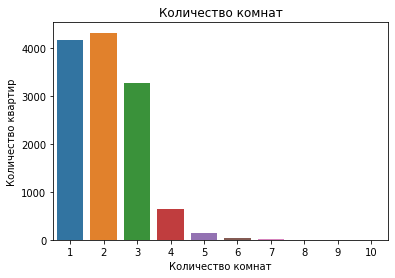

In [74]:
#Построим countplot для количества комнат:
sns.countplot(data['rooms'])
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Чаще всего продают 1 и 2-х комнатные квартиры. Относительно "догоняет" продажа 3-х комнатных квартир. Начиная с 4-х комнатных количество квартир на продажу резко падает.

Text(0, 0.5, 'Количество квартир')

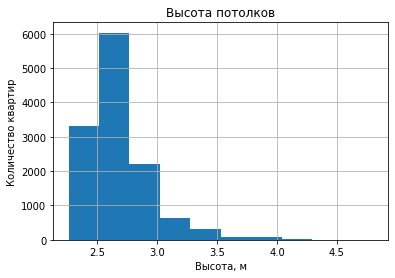

In [75]:
#Построим гистограму для высоты потолка:
data['ceiling_height'].hist()
plt.title('Высота потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество квартир')

Согласно графику, в основном высота потолков приходится между 2,5 и 3 м. Вспоминая данные в таблице, предположу, что в большинстве квартир высота потолков - 2,7 м.

Text(0, 0.5, 'Количество квартир')

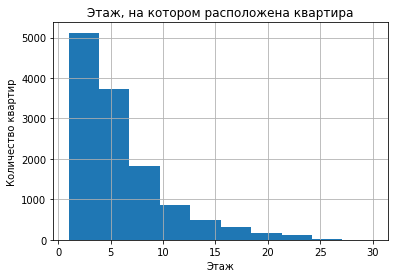

In [76]:
#Построим гистограму для этажа:
data['floor'].hist()
plt.title('Этаж, на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Наибольшее количество продаваемых квартир находятся ниже 10 этажа.

Text(0, 0.5, 'Количество квартир')

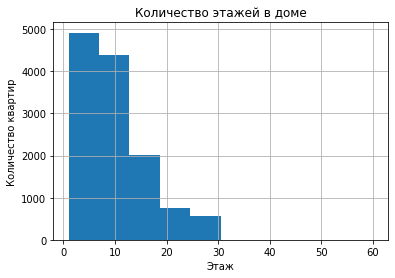

In [77]:
#Построим гистограму для количества этажей:
data['floors_total'].hist()
plt.title('Количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Квартиры расположены в домах, в которых от 1 до 31 этажа. Наиболее часто - до 7 этажей.

Text(0, 0.5, 'Количество квартир')

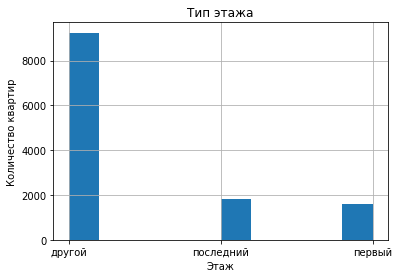

In [78]:
#Построим гистограму для типа этажа:
data['floor_group'].hist()
plt.title('Тип этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

В основном квартиры расположены между первым и последним этажами.

Text(0, 0.5, 'Количество квартир')

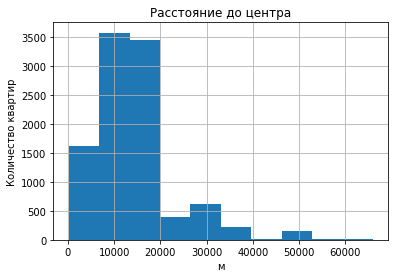

In [79]:
#Построим гистограму для расстояния до центра Спб:
data['city_centers_nearest'].hist()
plt.title('Расстояние до центра')
plt.xlabel('м')
plt.ylabel('Количество квартир')

В основном квартиры находятся в пределах 20 км от центра города.

Text(0, 0.5, 'Количество квартир')

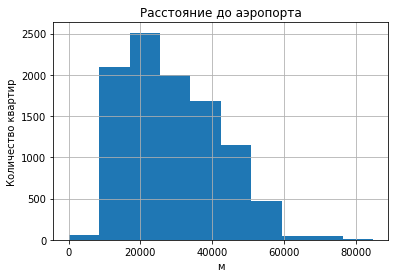

In [80]:
#Построим гистограму для расстояния до аэропорта:
data['airports_nearest'].hist()
plt.title('Расстояние до аэропорта')
plt.xlabel('м')
plt.ylabel('Количество квартир')

Почти все квартиры находятся в пределах 10-60 км от аэропорта.

Text(0, 0.5, 'Количество квартир')

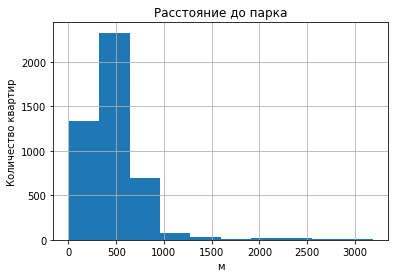

In [81]:
#Построим гистограму для расстояния до парка:
data['parks_nearest'].hist()
plt.title('Расстояние до парка')
plt.xlabel('м')
plt.ylabel('Количество квартир')

Большинство квартир находятся недалекот от парковых зон - в пределах 1 км.

Text(0, 0.5, 'Количество квартир')

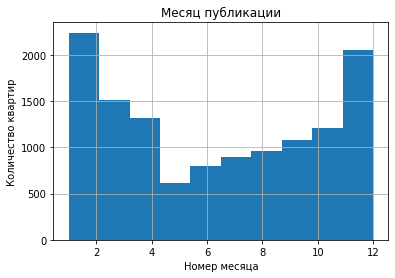

In [82]:
#Построим гистограму для месяца публикации объявления:
data['month'].hist()
plt.title('Месяц публикации')
plt.xlabel('Номер месяца')
plt.ylabel('Количество квартир')

Больше всего квартир выставлено на продажу в зимние месяцы.

Text(0, 0.5, 'Количество квартир')

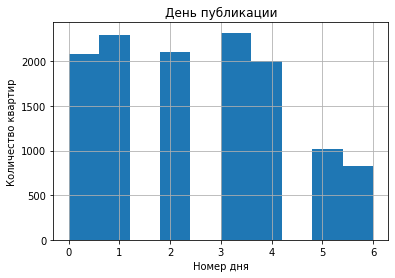

In [83]:
#Построим гистограму для дня публикации объявления:
data['week_day'].hist()
plt.title('День публикации')
plt.xlabel('Номер дня')
plt.ylabel('Количество квартир')

В будни выставляется больше квартир, в выходные их количество резко сокращается.

# Изучение времени продажи квартир

In [84]:
#Посмотрим, какие квартиры продавались дольше всего
data.sort_values(by = 'days_exposition', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_group,k_living,k_kitchen
18843,11,3500000.0,48.20,2014-12-15,2,2.50,5.0,27.40,2,False,False,False,7.70,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,72614.107884,0,12,2014,другой,0.568465,0.159751
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17.0,44.00,9,False,False,False,15.00,0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,132500.000000,1,12,2014,другой,0.550000,0.187500
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8.0,42.70,7,False,False,False,18.00,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,167085.427136,1,12,2014,другой,0.536432,0.226131
14093,7,9500000.0,100.00,2015-02-19,4,3.00,5.0,76.00,5,False,False,False,10.00,0,Санкт-Петербург,25950.0,4798.0,1.0,690.0,0.0,NaN,1497.0,95000.000000,3,2,2015,последний,0.760000,0.100000
19123,9,5990000.0,82.00,2015-02-19,3,3.00,4.0,60.00,2,False,False,False,8.00,0,Павловск,22465.0,34619.0,0.0,NaN,2.0,458.0,1485.0,73048.780488,3,2,2015,другой,0.731707,0.097561
4736,11,6650000.0,68.30,2015-02-19,4,2.63,5.0,45.10,4,False,False,False,9.00,0,Санкт-Петербург,20182.0,1724.0,3.0,606.0,3.0,453.0,1477.0,97364.568082,3,2,2015,другой,0.660322,0.131772
6006,4,4400000.0,38.63,2015-02-03,1,2.85,25.0,15.00,6,False,False,False,12.30,2,поселок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,1452.0,113901.113125,1,2,2015,другой,0.388299,0.318405
9555,11,9950000.0,61.20,2015-04-06,2,3.17,7.0,39.70,2,False,False,False,8.00,0,Санкт-Петербург,9740.0,10123.0,1.0,114.0,0.0,NaN,1434.0,162581.699346,0,4,2015,другой,0.648693,0.130719
14873,5,6400000.0,70.00,2015-02-19,4,3.10,5.0,56.70,3,False,False,False,8.00,0,Санкт-Петербург,24451.0,2780.0,3.0,273.0,1.0,753.0,1430.0,91428.571429,3,2,2015,другой,0.810000,0.114286
11985,1,15104000.0,118.00,2015-05-19,3,3.10,16.0,64.32,5,False,False,False,14.27,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,1417.0,128000.000000,1,5,2015,другой,0.545085,0.120932


В таблице имеются квартиры, которые продавались дольше 4-х лет.

Text(0, 0.5, 'Количество квартир')

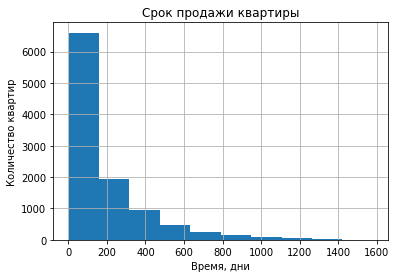

In [85]:
#Построим гистограму для времени продажи квартиры:
data['days_exposition'].hist()
plt.title('Срок продажи квартиры')
plt.xlabel('Время, дни')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

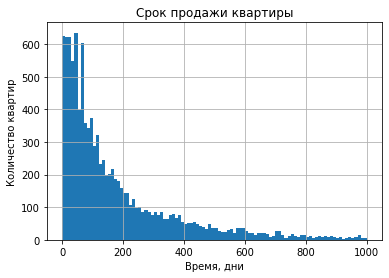

In [86]:
data['days_exposition'].hist(bins=100, range=(0, 1000))
plt.title('Срок продажи квартиры')
plt.xlabel('Время, дни')
plt.ylabel('Количество квартир')

In [87]:
data['days_exposition'].describe()

count    10551.000000
mean       188.562695
std        225.244391
min          1.000000
25%         44.000000
50%        105.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

Есть много квартир, которые продаются всего по 40-50 дней, однако медианное время составляет 105 дней. В среднем квартиры продаются за 188,5 дней. Получается, что часть квартир продается в 1,7 раза дольше, чем обычно. Быстрее всего квартира была продана за день, дольше всего за 1590 дней, более 600 дней продавалось очень мало квартир.

Думаю, что быстрой можно назвать продажу менее 45 дней, долгой - соответсвенно - более 240 дней.

# Факторы, влияющие на общую (полную) стоимость объекта

Для начала изучим, зависит ли цена за м2 от площади квартиры

0.1906345664910154

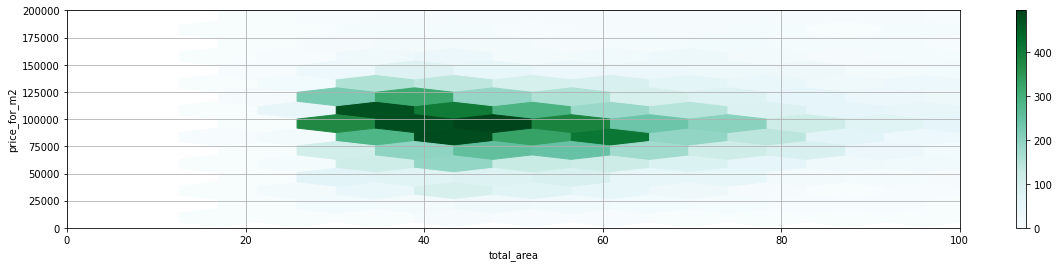

In [88]:
data.plot(x='total_area', y='price_for_m2', kind='hexbin', gridsize=70, figsize=(20, 4), sharex=False, grid=True) 
plt.xlim(0, 100)
plt.ylim(0, 200000)

#рассчитаем коэффициент корреляции Пирсона:
data['total_area'].corr(data['price_for_m2'])

Т.к. коэффициент корреляции составляет примерно 0.19, думаю, следует считать, что зависимости между площадью квартиры и ценой за м2 нет.

Далее изучим, зависит ли цена за м2 от жилой площади 

0.11728301748116263

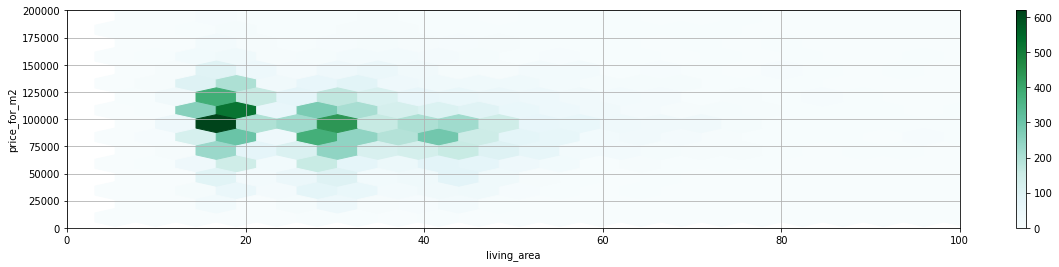

In [89]:
data.plot(x='living_area', y='price_for_m2', kind='hexbin', gridsize=70, figsize=(20, 4), sharex=False, grid=True) 
plt.xlim(0, 100)
plt.ylim(0, 200000)

#рассчитаем коэффициент корреляции Пирсона:
data['living_area'].corr(data['price_for_m2'])

зависимости также нет, коэффицент корреляции равен 0.11

Далее изучим, зависит ли цена за м2 от  площади кухни 

0.3083772597880294

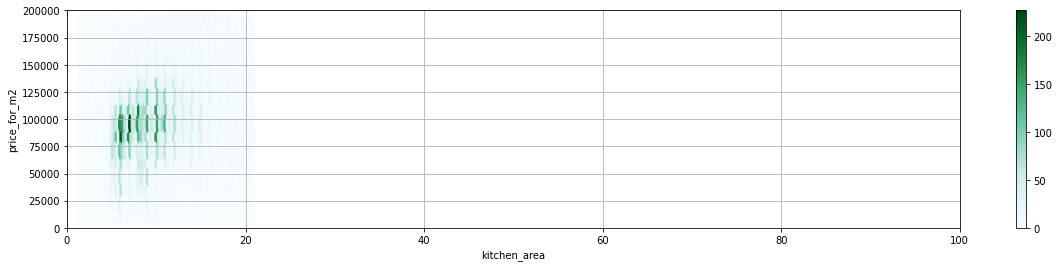

In [90]:
data.plot(x='kitchen_area', y='price_for_m2', kind='hexbin', gridsize=70, figsize=(20, 4), sharex=False, grid=True) 
plt.xlim(0, 100)
plt.ylim(0, 200000)

#рассчитаем коэффициент корреляции Пирсона:
data['kitchen_area'].corr(data['price_for_m2'])

В целом, между площадью кухни и ценой за м2 есть средней силы связь, однако все же, на мой взгляд, не столь существенная.

Далее изучим, зависит ли цена за м2 от числа комнат

<AxesSubplot:xlabel='rooms'>

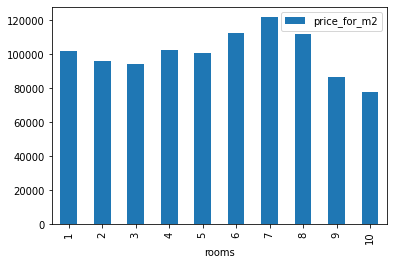

In [91]:
data.pivot_table(index='rooms', values='price_for_m2').plot(y='price_for_m2', kind='bar')

В целом на мой взгляд, особой зависимости нет, хотя м2 в многокомнатных квартирах (9 и 10) стоит все же дешевле. Однако и покупают такие квартиры крайне редко, а в квартирах с 1-3 комнатами цена за м2 близкая.

Изучим, зависит ли цена за м2 от этажа.

Text(0, 0.5, 'Количество квартир')

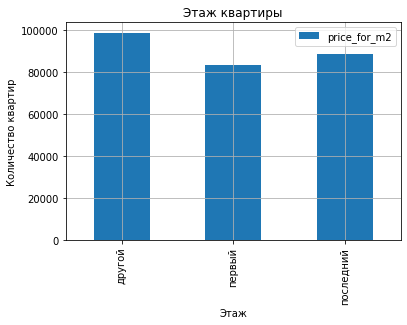

In [92]:
data.pivot_table(index='floor_group', values='price_for_m2', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Зависимость между ценой за м2 и этажом имеется, т.к. самые дорогие квартиры расположены между первым и последним этажами. Самые дешевые квартиры располагаются на первых этажах, на последнем - чуть дороже.

Изучим, зависит ли цена за м2 от даты размещения объявления

<AxesSubplot:xlabel='year'>

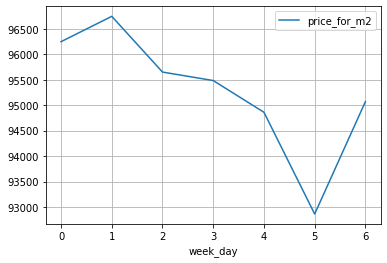

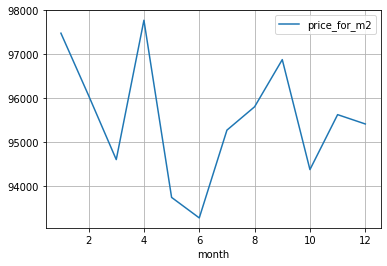

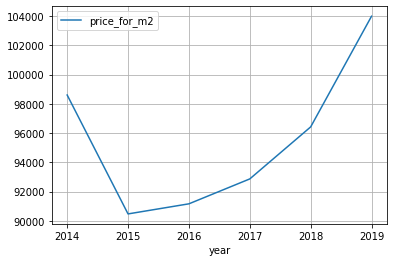

In [93]:
#зависимость от дня недели:
data.pivot_table(index='week_day', values='price_for_m2', aggfunc='median').plot(grid=True)

#зависимость от месяца:
data.pivot_table(index='month', values='price_for_m2', aggfunc='median').plot(grid=True)

#зависимость от года:
data.pivot_table(index='year', values='price_for_m2', aggfunc='median').plot(grid=True)

День недели особенно не влияет, но все же самые дешевые квартиры чаще всего публикуются по субботам. Месяц в целом не влияет тоже, хотя все равно самые дешевые квартиры публикуются летом в июне. А вот с годом зависимость есть - после кризиса 2014 г. цены на жилье упали в среднем на 10-20%, а по некоторомы данным - на 40-50%, согласно РБК.  Стабилизация рынка пришлась уже на рубеж 2018-2019 гг.

# Средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

Выберем 10 населенных пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в них

In [94]:
sample=data.pivot_table(index = 'locality_name', values = 'price_for_m2', aggfunc=('count', 'mean')).sort_values(by='count', ascending = False).head(10)
sample

,count,mean
locality_name,,
Санкт-Петербург,8764,111162.712234
Всеволожск,240,67448.132640
Пушкин,203,101737.486379
поселок Шушары,199,79371.643933
Колпино,188,75701.660037
поселок Мурино,186,86840.370842
Петергоф,135,84535.864624
Гатчина,133,69493.135186
поселок Парголово,130,91177.100569


Посмотрим, в каких населенных пунктах самые дорогие и самые дешевые квартиры

In [95]:
display(sample[sample['mean']==sample['mean'].max()])
display(sample[sample['mean']==sample['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,8764,111162.712234


,count,mean
locality_name,,
Всеволожск,240,67448.13264


Самая высокая стоимость жилья представлена в самом городе СПб и составляет 111163 рублей. Самые дешевые квартиры в Всеволожске - 67448 рублей.

# Стоимость объектов зависит от расстояния до центра города.

In [96]:
#Выделим квартиры в Санкт-Петербурге:
spb_data=data.query('locality_name == "Санкт-Петербург"')

#Создадим столбец с расстоянием до центра в километрах (округлим метры до целых значений):
spb_data['citycenters_km'] = round(spb_data['city_centers_nearest'] / 1000, 0)

spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_group,k_living,k_kitchen,citycenters_km
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый,0.678049,0.109756,11.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104838.709677,4,1,2017,другой,0.625806,0.180645,11.0
19,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,117355.371901,2,1,2019,другой,0.628099,0.099174,13.0


In [97]:
#посчитаем среднюю цену для каждого километра.:
spb_pivot=spb_data.pivot_table(index = 'citycenters_km', values = 'price_for_m2', aggfunc = 'mean')
display(spb_pivot.head(20))

,price_for_m2
citycenters_km,
0.0,169210.381031
1.0,139601.559534
2.0,157862.730451
3.0,117006.229359
4.0,123455.652067
5.0,129966.546260
6.0,131529.509116
7.0,145506.053706
8.0,122851.970991


<AxesSubplot:xlabel='citycenters_km'>

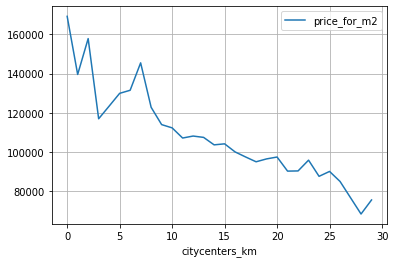

In [98]:
#постром график зависимости цены от удаленности от центра:
spb_pivot.plot(grid=True)

В целом, очевидный изначально вывод, что чем дальше от центра, тем дешевле, подтвержждается, однако, на 2ом и на 7ом километрах наблюдается подъемы, вероятно, обусловленные наличием более элитного жилья в более пригодных для жилья районах: у парков, набережных и тд. После 7 км график идет стабильно вниз, чем дальше от центра, тем дешевле. Таким образом, самое дорогое жилье сосрежоточено в пределах 7 км от центра.

### Общий вывод

В данном анализе сначала проведена подробная предобработка данных, затем добавлены дополнительные недостающие столбцы. 
Выявлено, чт о в основном площадь квартир составляет от 25 до 60 м2 стоимостью от 3 до 7 млн рублей. Цена за м2 в среднем - 90 тыс рублей. 
Чаще всего продают однушки и двушки, за ними не очень отстали трешки. Четыере и более комнат продаются редко. Высота потолков в среднем 2,7м., при этом чаще всего продаются квартиры не выше 10 этажа (вероятно, девятиэтажки). Иногда квартиру удается продать за 2 месяца, самая долгая продажа длилась более 4х лет.
На стоимость за м2 не особенно влияет площадь, жилая площадь, площадь кухни, количество комнат, день и месяц продажи, но влияет год продажи.
Самые дорогие квартиры расположены между первым и последним этажом, самые дешевые - на первом.
Самое дорогое жилье находится в Сантк-Петербурге, стоимость за м2 сотавила 111163 руб, самая дешевая в представленной выборке - во Всеволожске - 67448 рублей.
И последний очевидный  вывод, что чем дальше от центра, тем дешевле, однако, на 2ом и на 7ом километрах наблюдаются подъемы, вероятно, обусловленные наличием более элитного жилья в более пригодных для жилья районах: у парков, набережных и тд. После 7 км график идет стабильно вниз, чем дальше от центра, тем дешевле. Таким образом, самое дорогое жилье сосредоточено в пределах 7 км от центра.